# Support Vector Machine (SVM)

A support vector machine(SVM) is a supervised learning model that used for classification pupose for two-group
classification problems. Each sample belongs to one or the other of two classes, an SVM algorithm builds a model that
assigns new samples to one class or the other, making binary linear classifier. SVM maps from lower dimensional space
to higher dimensional space. It is a discriminative classifier defined by hyperplane.

# Dataset

Car Evaluation Database was derived from a simple hierarchical decision model originally developed for the demonstration
of DEX, M. Bohanec, V. Rajkovic: Expert system for decision making. The Car Evaluation Database contains examples with 
the structural information removed, i.e., directly relates CAR to the six input attributes: buying, maint, doors, persons,
lug_boot, safety. Because of known underlying concept structure, this database may be particularly useful for testing
constructive induction and structure discovery methods.
Attribute Information:

Class Values: unacc, acc, good, vgood

Attributes: buying: vhigh, high, med, low. maint: vhigh, high, med, low. doors: 2, 3, 4, 5more.
persons: 2, 4, more. lug_boot: small, med, big. safety: low, med, high.

In [98]:
#importing libraries
import pandas as pd
#commonly used Python data analysis package
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
#library used for splitting the training and testing dataset.
from sklearn.model_selection import train_test_split, cross_val_predict
#library for linear support vector machine classifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import classification_report
#plotting library for the Python programming language and its numerical
#mathematics extension NumPy. 
from matplotlib import pyplot as plt
%matplotlib inline

In [99]:
#loading dataset
df = pd.read_csv("car_evaluation.csv")

In [100]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [101]:
#shape of dataset: 7 columns and 1727 entries
df.shape

(1727, 7)

In [102]:
#Checking whether there is any null value
df.isnull().values.any()

False

In [103]:
#total unique values in each column 
df.nunique()

vhigh      4
vhigh.1    4
2          4
2.1        3
small      3
low        3
unacc      4
dtype: int64

In [104]:
#converting columns from category to numbers
#preprocessing of data
def mapping_cat_to_num (col_name):
     df[col_name].unique()
     col_list = list(df[col_name].unique())
     col_dict = {}
     for i in range (len(col_list)):
         col_dict[col_list[i]] = i
     return col_dict


In [105]:
categorical_column = list(df.select_dtypes(exclude = ['number']).columns)

In [106]:
categorical_column

['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc']

In [107]:
cleanup_nums = {}
for i in categorical_column:
    cleanup_nums[i] = mapping_cat_to_num(i)


In [108]:
cleanup_nums

{'vhigh': {'vhigh': 0, 'high': 1, 'med': 2, 'low': 3},
 'vhigh.1': {'vhigh': 0, 'high': 1, 'med': 2, 'low': 3},
 '2': {'2': 0, '3': 1, '4': 2, '5more': 3},
 '2.1': {'2': 0, '4': 1, 'more': 2},
 'small': {'small': 0, 'med': 1, 'big': 2},
 'low': {'med': 0, 'high': 1, 'low': 2},
 'unacc': {'unacc': 0, 'acc': 1, 'vgood': 2, 'good': 3}}

In [109]:
#replacing values
df.replace(cleanup_nums, inplace=True)

In [110]:
#show dataset
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,1,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...
1722,3,3,3,2,1,0,3
1723,3,3,3,2,1,1,2
1724,3,3,3,2,2,2,0
1725,3,3,3,2,2,0,3


In [111]:
# X contains column from 1 to 6 with all rows 
X = df.iloc[:,1:6]
# Y conatins last column for labelling, 6th column with all rows
Y = df.iloc[:,6]

In [112]:
# splitting the dataset into training and testing data, 80% and 20% splitting
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=90)


In [113]:
#fitting the model : Linear support vector classifier
svc = LinearSVC()
svc.fit(x_train, y_train)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [114]:
#predicting the accuracy, confusion matrix etc
y_pred = svc.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))


[[228  17   0   0]
 [ 42  32   0   0]
 [ 11   7   0   0]
 [  1   8   0   0]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       245
           1       0.50      0.43      0.46        74
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00         9

    accuracy                           0.75       346
   macro avg       0.33      0.34      0.33       346
weighted avg       0.68      0.75      0.71       346

Accuracy: 0.7514450867052023


C:\Users\pjyaw\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [115]:
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#%matplotlib inline
from scipy import stats
#use seaborn plotting defaults
import seaborn as sns; sns.set()

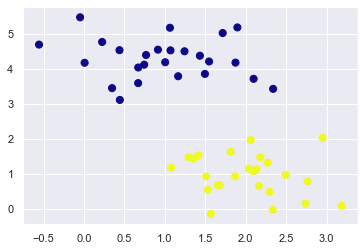

In [116]:
#Two types of classification: generative classification (model each class’s distribution and
#find probability for new samples)#Discriminative classification (rather than modelling each class, 
#we simply find a line or curve (in two dimensions) or manifold (in multiple dimensions) that divides the classes
#from each other.

from sklearn.datasets.samples_generator import make_blobs
V, w = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(V[:, 0], V[:, 1], c=w, s=50, cmap = 'plasma');

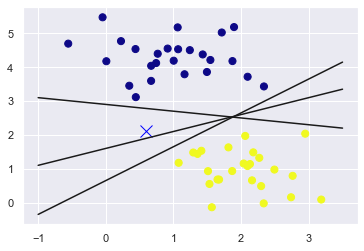

In [117]:
#A linear discriminative classifier would attempt to draw a straight line separating the two
#sets of data, and thereby create a model for classification.
#But immediately we see a problem: there are more than one possible dividing line that
#can perfectly discriminate between the two classes!
xfit = np.linspace(-1, 3.5)
plt.scatter(V[:, 0], V[:,1], c=w, s=50, cmap='plasma')
plt.plot([0.6],[2.1],'x',color='blue',linewidth = 2, markersize = 12)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m* xfit + b, '-k')

In [118]:
# support vecto machine: maximizing the margine

A linear discriminative classifier would attempt to draw a straight line separating the two
sets of data, and thereby create a model for classification.
there are more than one possible dividing line that can perfectly discriminate between the two classes.
Support vector machines offer one way to improve on this.
rather than simply drawing a zero-width line between the classes,
can draw around each line a margin of some width, up to the nearest point.

(-1, 3.5)

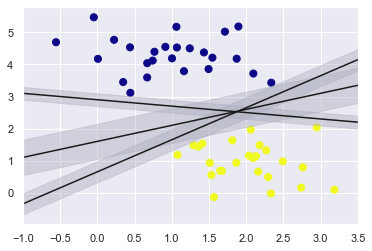

In [119]:
xfit = np.linspace(-1, 3.5)
plt.scatter(V[:, 0], V[:,1], c=w, s=50, cmap='plasma')
#plt.plot([0.6],[2.1],'x',color='red',linewidth = 2, markersize = 12)

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor = 'red', color = '#AAABBB', alpha = 0.4)
plt.xlim(-1, 3.5)    

In [120]:
# fitting a support vector machine

In [121]:
#support vector classifier
#For the time being, we will use a linear kernel and set the C parameter to a very large
from sklearn.svm import SVC
model = SVC(kernel = 'linear', C=1E10)
model.fit(V, w)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [122]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    #create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y ,x )
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    #plot decision boundary and margins
    ax. contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    #plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='orange');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

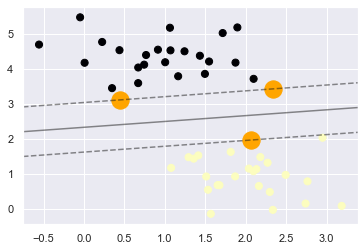

In [123]:
plt.scatter(V[:, 0], V[:, 1], c=w, s=50,cmap='magma')
plot_svc_decision_function(model);

In [124]:
#This is the dividing line that maximizes the margin between the two sets of points. 
#few of the training points just touch the margin: they are indicated by the black
#circles in this figure. These points are the pivotal elements of this fit, and are known as
#the support vectors, and give the algorithm its name.

In [125]:
#these points do not contribute to the loss function used to fit the
#model, so their position and number do not matter so long as they do not cross the margin

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

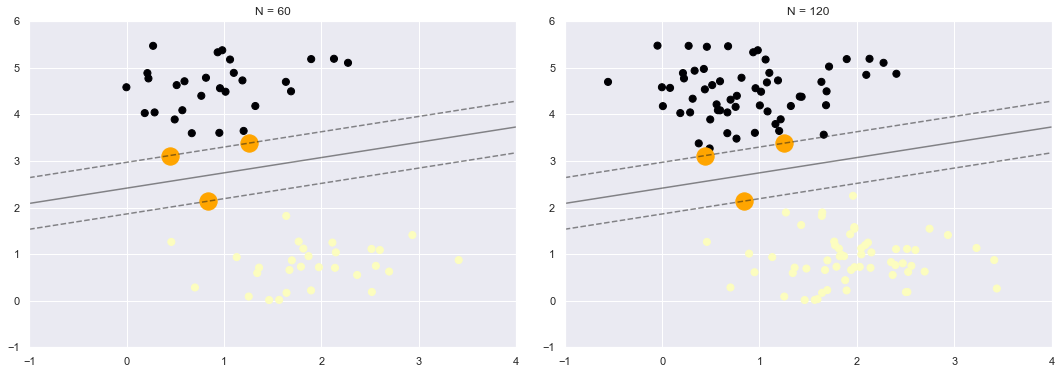

In [126]:
def plot_svm(N=10, ax =None):
    X, y = make_blobs(n_samples=200, centers = 2,random_state = 0,cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    #selects the kernel as linear 
    model = SVC(kernel = 'linear',C=1E10)
    #fit the model
    model.fit(X, y)
    ax = ax or plt.gca()
    #plot the scatter plot
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap= 'magma')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right =0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [127]:
#In the left panel, we see the model and the support vectors for 60 training points.
#In the right panel, we have doubled the number of training points, but the model has not
#changed: The three support vectors from the left panel are still the support vectors from the right
#panel.This insensitivity to the exact behaviour of distant points is one of the strengths of the SVM
#mode

In [128]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax =fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

In [129]:
# Beyond Linear Boundaries: Kernel SVM

In [130]:
#Where SVM becomes extremely powerful is when it is combined with kernels.
##Projecting our data into higher-dimensional space defined by polynomials and Gaussian
#basis functions, and thereby we can easily make a fit for nonlinear relationships with a
#linear classifier.
#linearly separable:

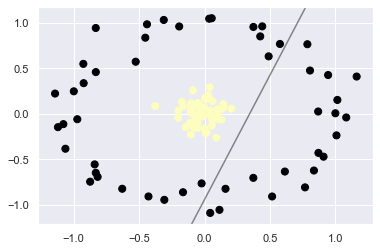

In [131]:
from sklearn.datasets.samples_generator import make_circles
X, y =make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap = 'magma')
plot_svc_decision_function(clf, plot_support=False);

In [132]:
#no linear discrimination will ever be able to separate this data.
#To do this, we might project the data into a higher dimension such that a linear
#separator would be sufficient.

In [133]:
r = np.exp(-(X ** 2).sum(1))

In [134]:
from mpl_toolkits import mplot3d
def plot_3D(elev=30, azim=30, X=X, y=y):
    #3D projection
    ax = plt.subplot(projection='3d')
    #3D scatter plot
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='magma')
    #ax.view_init(elev=elev, azim=azim)
    #labelling
    ax.set_xlabel('x')
    ax.set_xlabel('y')
    ax.set_xlabel('r')
    
interact(plot_3D, elev=[-90, 90], azip=(-180, 180), X=fixed(X), y=fixed(y));


interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

We can see that with this additional dimension, the data becomes trivially linearly separable, 
In general,automatically find the best basis functions to use.

In [135]:
# Method to automatically finding best basis functions(kernel trick)

Method: To compute a basis function centered at every point in the dataset is to let the
SVM algorithm sift through the results. This type of basis function transformation is known
as a kernel transformation, as it is based on a similarity relationship (or kernel) between
each pair of points.

In [136]:
clf = SVC(kernel = 'rbf', C=1E6)
clf.fit(X,y)

C:\Users\pjyaw\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

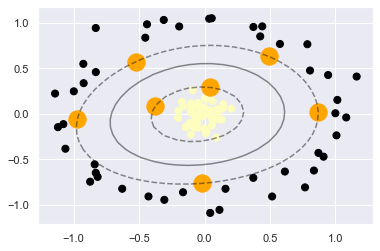

In [137]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='magma')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[: , 1], s=300, lw=1, facecolors='none');


Using this kernelized support vector machine, we learn a suitable nonlinear decision boundary.
This kernel transformation strategy is used often in machine learning to turn fast linear
methods into fast nonlinear methods, especially for models in which the kernel trick can be used.